In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
alpha = 0.5

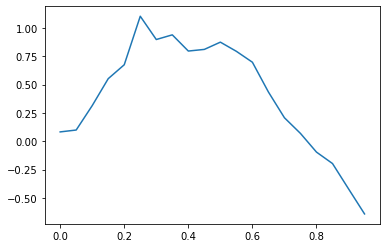

In [70]:
X = np.arange(0,1,0.05)
y = np.sin(4*X) + 0.1*np.random.normal(0,1,20)

plt.plot(X,y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [142]:
def create_X_poly_features(X, degree):
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X.reshape(-1, 1))
    return X_poly

def ols_closed_form(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta 

def calculate_rss(y, y_hat):
    error = ((y-y_hat)@(y-y_hat).T)/(2*y.shape[0])
    return error

def one_gd_iteration(theta, X, y, learning_rate, l2_lambda):
    theta_interim = theta*(1-2*l2_lambda*learning_rate)
    theta = theta_interim + (learning_rate/X.shape[0])*(X.T)@(y-X@theta)
    return theta_interim, theta

def run_gd(theta, X, y, learning_rate= 0.1, l2_lambda = 0):
    theta_list = []
    cost_list = []

    for epoch in range(10):
        theta_interim, theta = one_gd_iteration(theta, X, y, learning_rate, l2_lambda)
#         if l2_lambda != 0:
        theta_list.append(theta_interim)
        theta_list.append(theta)
        rss_gd = calculate_rss(y, X@theta)
        cost_list.append(rss_gd)
        
    return theta_list, cost_list

In [143]:
Xtrain_poly.shape

(15, 6)

No regularization





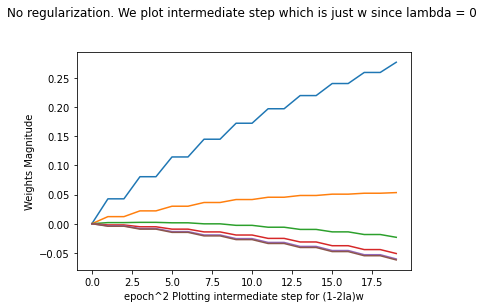

In [150]:
print('No regularization\n\n\n')

Xtrain_poly = create_X_poly_features(Xtrain, 5)
theta_gd = np.zeros((Xtrain_poly.shape[-1]))

theta_list, cost_list = run_gd(theta_gd, Xtrain_poly, ytrain, learning_rate= 0.1, l2_lambda = 0)
plt.plot(theta_list);
plt.xlabel('epoch^2 Plotting intermediate step for (1-2la)w');
plt.ylabel('Weights Magnitude')
plt.title("No regularization. We plot intermediate step which is just w since lambda = 0 \n\n ");

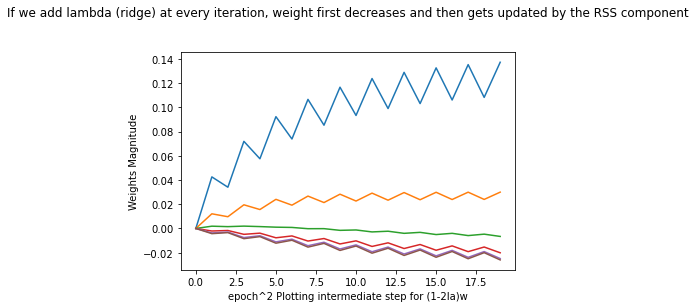

In [148]:
Xtrain_poly = create_X_poly_features(Xtrain, 5)
theta_gd = np.zeros((Xtrain_poly.shape[-1]))

theta_list, cost_list = run_gd(theta_gd, Xtrain_poly, ytrain, learning_rate= 0.1, l2_lambda = 1)
plt.plot(theta_list);
plt.xlabel('epoch^2 Plotting intermediate step for (1-2la)w');
plt.ylabel('Weights Magnitude')
plt.title("If we add lambda (ridge) at every iteration, weight first decreases and then gets updated by the RSS component\n\n ");

 Case:  $2 \alpha \lambda >1  $ 

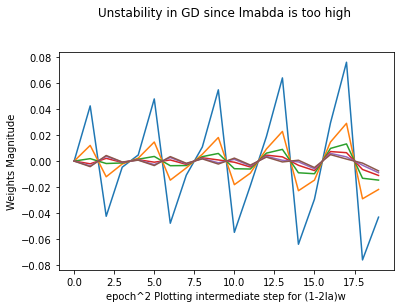

In [161]:
from IPython.display import display, Markdown

display(Markdown(
   rf""" Case:  $2 \alpha \lambda >1  $ """))

Xtrain_poly = create_X_poly_features(Xtrain, 5)
theta_gd = np.zeros((Xtrain_poly.shape[-1]))

theta_list, cost_list = run_gd(theta_gd, Xtrain_poly, ytrain, learning_rate= 0.1, l2_lambda = 10)
plt.plot(theta_list);
plt.xlabel('epoch^2 Plotting intermediate step for (1-2la)w');
plt.ylabel('Weights Magnitude')
plt.title("Unstability in GD since lmabda is too high \n\n ");
